In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from hierarqcal import (
    Qhierarchy,
    Qcycle,
    Qpermute,
    Qmask,
    Qunmask,
    Qpivot,
    Qinit,
    Qmotif,
    Qmotifs,
    plot_motif,
    plot_circuit,
    Qunitary,
)

In [10]:
# from hierarqcal import Qconv, Qpool, Qfree
# from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister

# def U(bits, symbols=None, circuit=None):
#     q0, q1 = QuantumRegister(1, bits[0]), QuantumRegister(1, bits[1])
#     circuit.cry(symbols[0], q0, q1)
#     circuit.cry(symbols[1], q1, q0)
#     return circuit

# q_n= [f"q{k}" for k in range(1,6,1)] # qubit names
# conv_1 = Qfree(q_n) + Qconv(1, convolution_mapping=(U,2))
# conv_3 = Qfree(q_n) + Qconv(3, convolution_mapping=(U,2))

In [11]:
import pennylane as qml
from hierarqcal.pennylane.pennylane_circuits import V2, U2, V4

def get_circuit(hierq):
    dev = qml.device("default.qubit", wires=hierq.tail.Q)

    @qml.qnode(dev)
    def circuit():
        if isinstance(next(hierq.get_symbols(), False), sp.Symbol):
            # Pennylane doesn't support symbolic parameters, so if no symbols were set (i.e. they are still symbolic), we initialize them randomly
            hierq.set_symbols(np.random.uniform(0, 2 * np.pi, hierq.n_symbols))
        hierq(
            backend="pennylane"
        )  # This executes the compute graph in order
        return [qml.expval(qml.PauliZ(wire)) for wire in hierq.tail.Q]

    return circuit

def draw_circuit(circuit, **kwargs):
    fig, ax = qml.draw_mpl(circuit)(**kwargs)

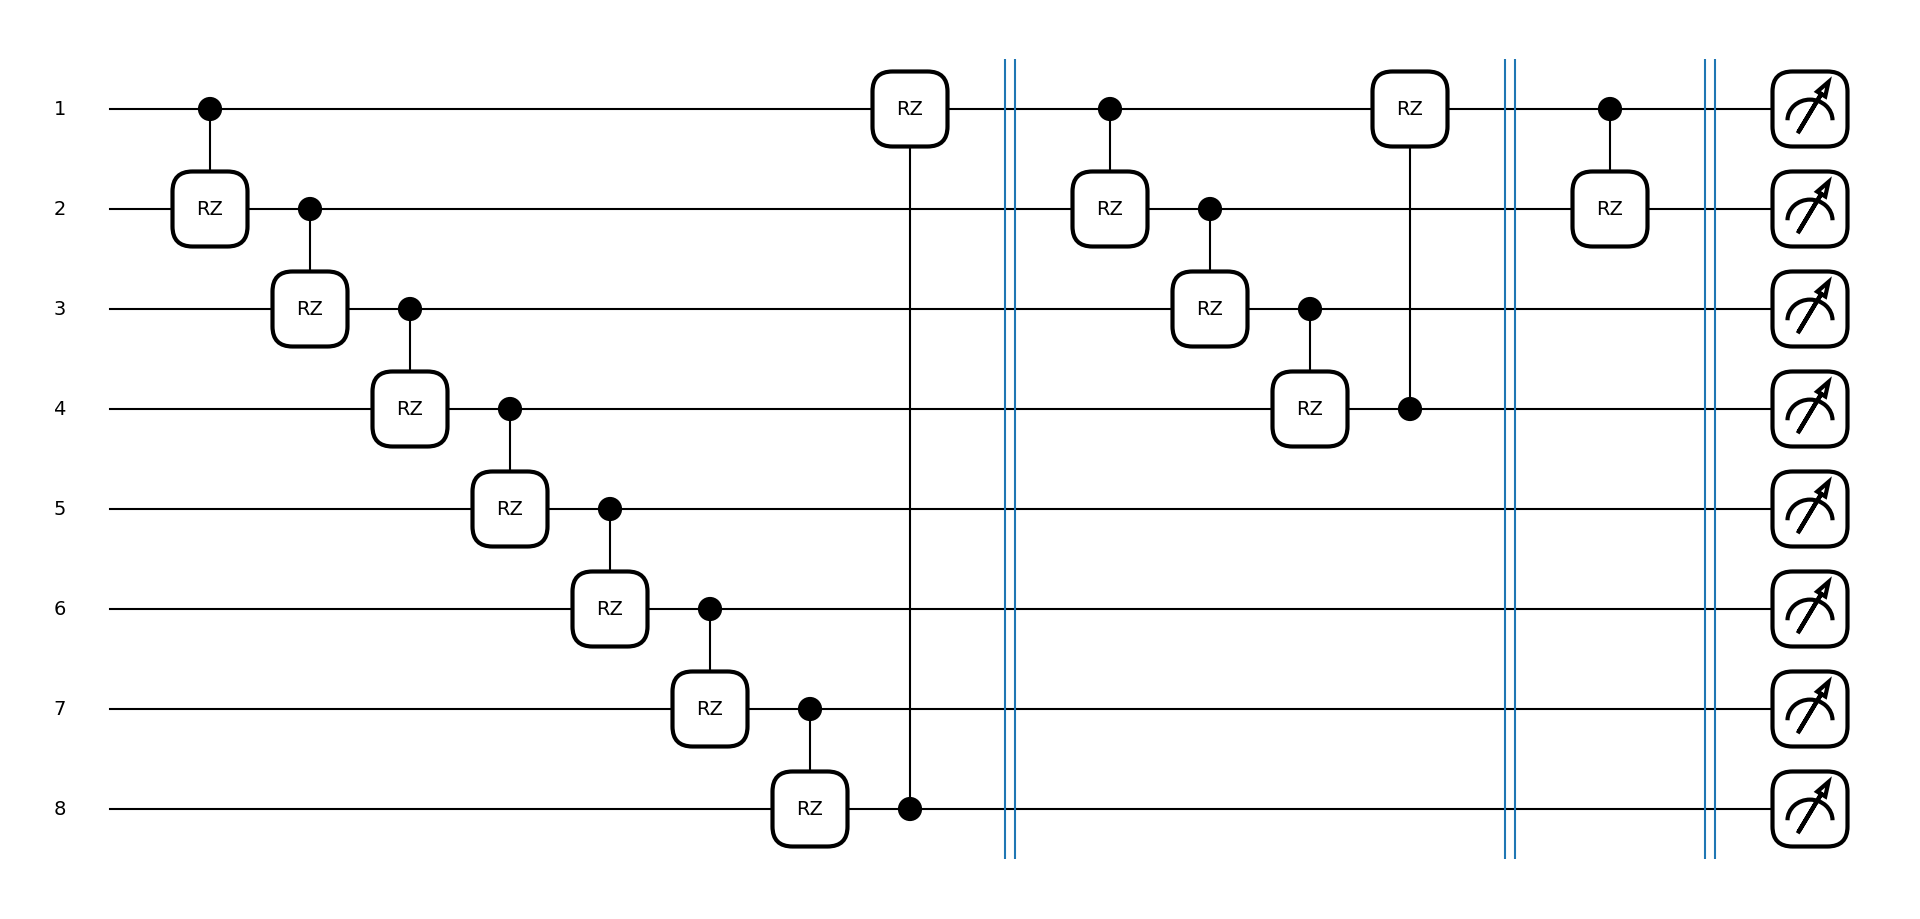

In [12]:
m = Qcycle(1) + Qmask("right")
heirq = Qinit(8) + m*3
circuit = get_circuit(heirq)
draw_circuit(circuit)

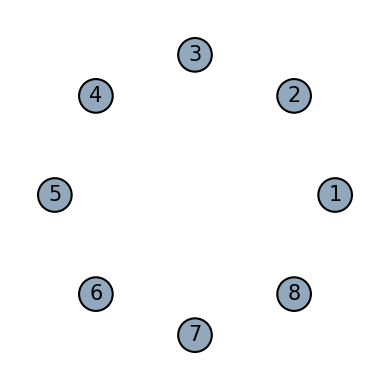

In [13]:
init_primitive = Qinit(8)
fig, ax = plot_motif(init_primitive)

In [14]:
# Convolution of stride 3, try out other stride values
u1_2 = Qunitary(function=None, n_symbols=1, arity=2)
cycle = Qcycle(stride=5, mapping=u1_2)
cycle_on_8_qubits = Qinit(8) + cycle

# Note the type of 'conv_on_8_qubits', it's a qcnn with two motifs: (Qfree, Qconv)
print(f"Type of object\t {type(cycle_on_8_qubits)}")
print(f"First motif\t {type(cycle_on_8_qubits.tail)}")
print(f"Second motif\t {type(cycle_on_8_qubits.tail.next)}")

Type of object	 <class 'hierarqcal.core.Qhierarchy'>
First motif	 <class 'hierarqcal.core.Qinit'>
Second motif	 <class 'hierarqcal.core.Qcycle'>


(<Figure size 400x400 with 1 Axes>, <Axes: >)

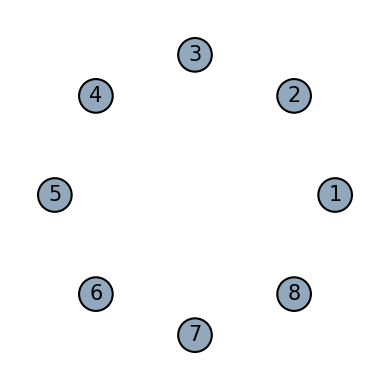

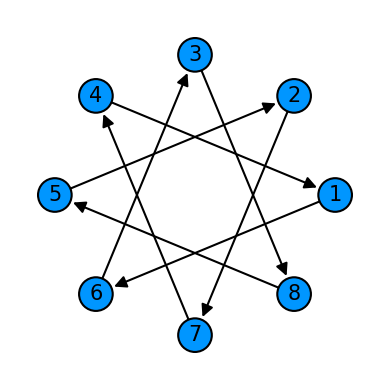

In [15]:
plot_motif(cycle_on_8_qubits[0])
plot_motif(cycle_on_8_qubits[1])
# Ciao io sono un gattino un po- scontroso ma in realt´, se mi acchiappi, divento molto coccoloso miao miao by ludin

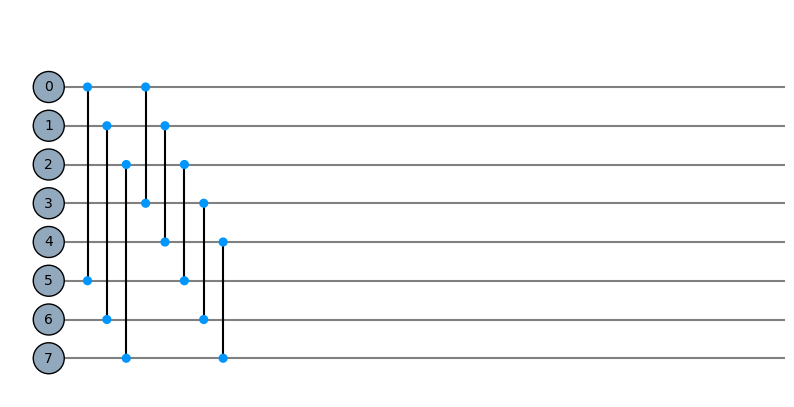

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [16]:
plot_circuit(cycle_on_8_qubits)

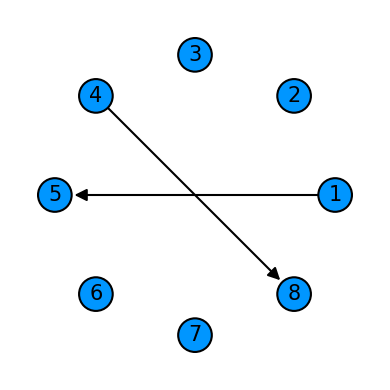

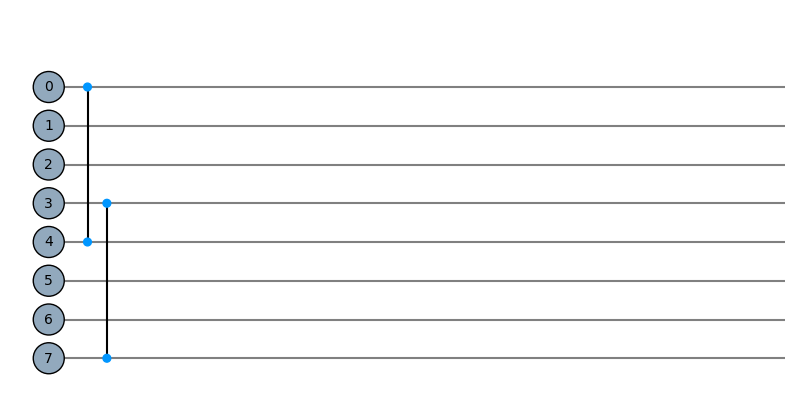

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [41]:
cycle = Qcycle(stride=4, step=3,offset=0, mapping=u1_2, boundary="open")
cycle = Qinit(8) + cycle
plot_motif(cycle[1])
plot_circuit(cycle)

In [18]:
def U3(bits, symbols=None):
  qml.CRZ(symbols[0], wires=[bits[0], bits[1]])
  qml.CRX(symbols[1], wires=[bits[2], bits[1]])
u3 = Qunitary(U3, 2, 3)

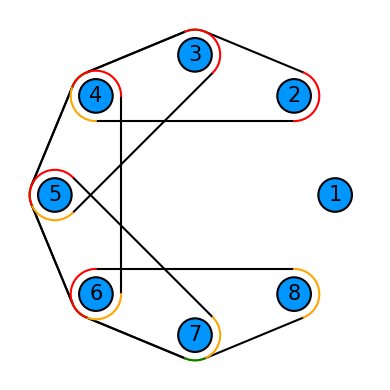

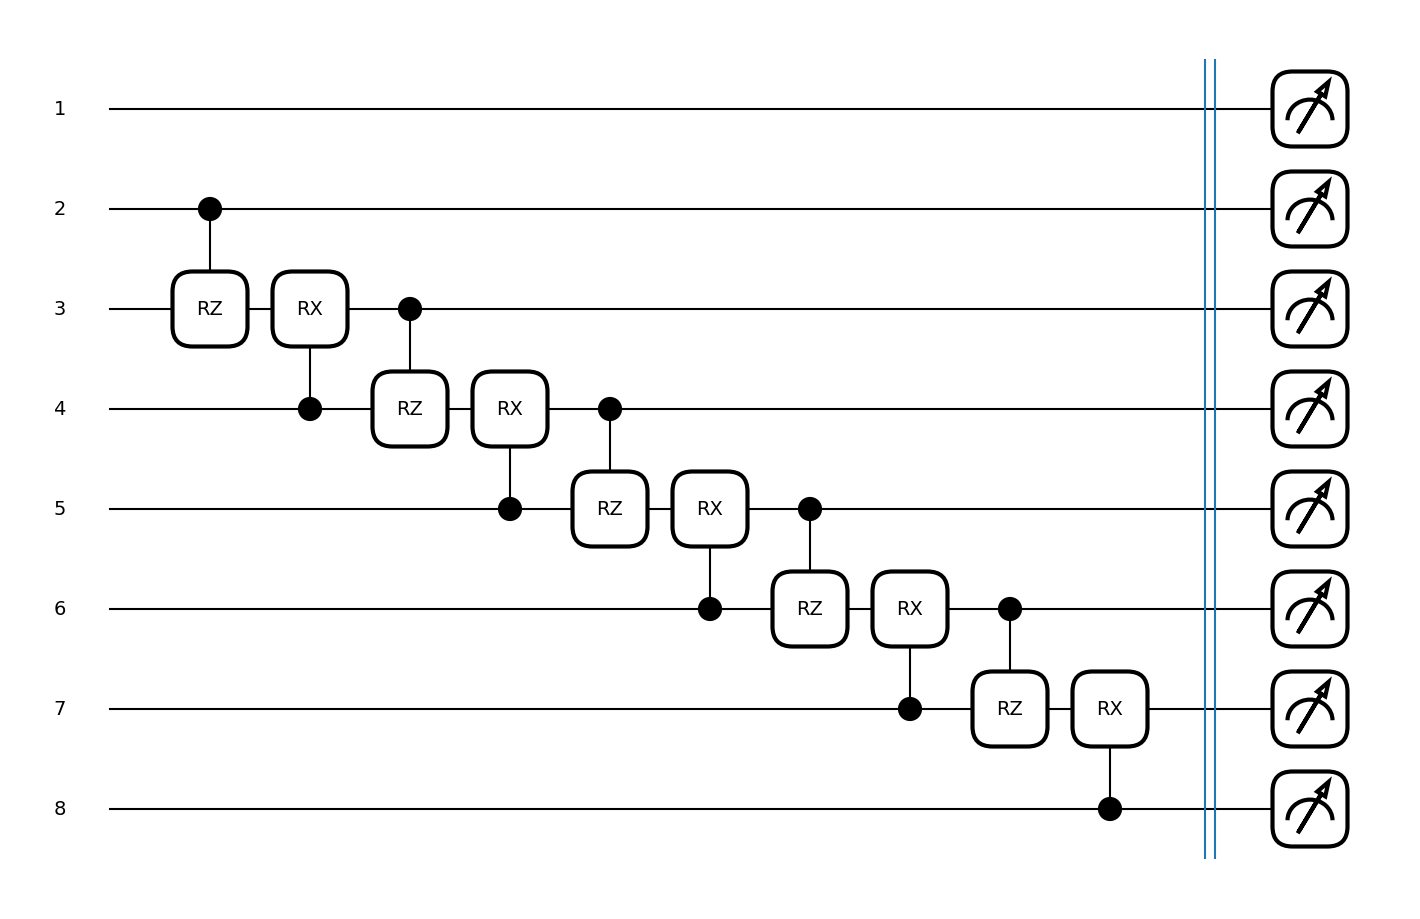

In [19]:
cycle = Qcycle(stride=1, step=1,offset=1, mapping=u3, boundary="open")
cycle = Qinit(8) + cycle
plot_motif(cycle[1])
circuit = get_circuit(cycle)
draw_circuit(circuit)

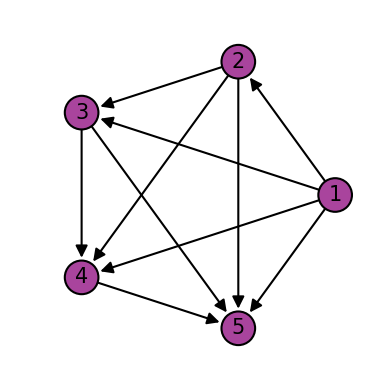

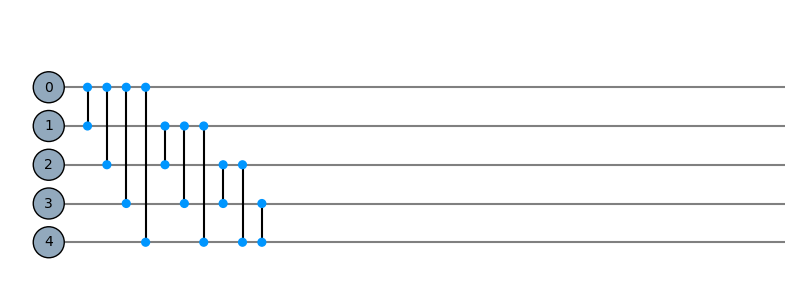

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [20]:
permute = Qpermute()
permute_5_qubits = Qinit(5) + permute
plot_motif(permute_5_qubits[1])
plot_circuit(permute_5_qubits)


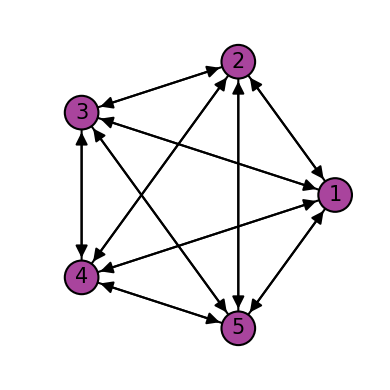

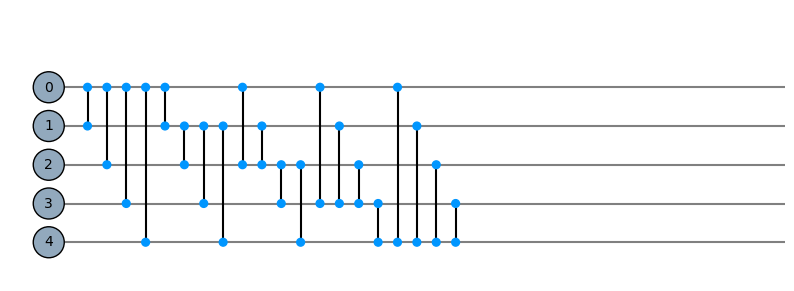

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [21]:
permute = Qpermute(combinations=False)
permute_5_qubits = Qinit(5) + permute
plot_motif(permute_5_qubits[1])
plot_circuit(permute_5_qubits)

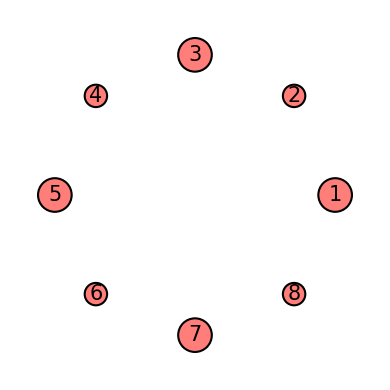

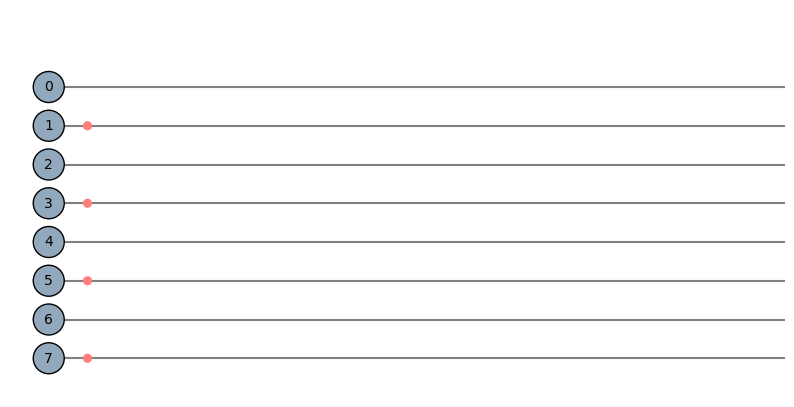

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [22]:
mask = Qinit(8) + Qmask("01")
plot_motif(mask[1])
plot_circuit(mask)

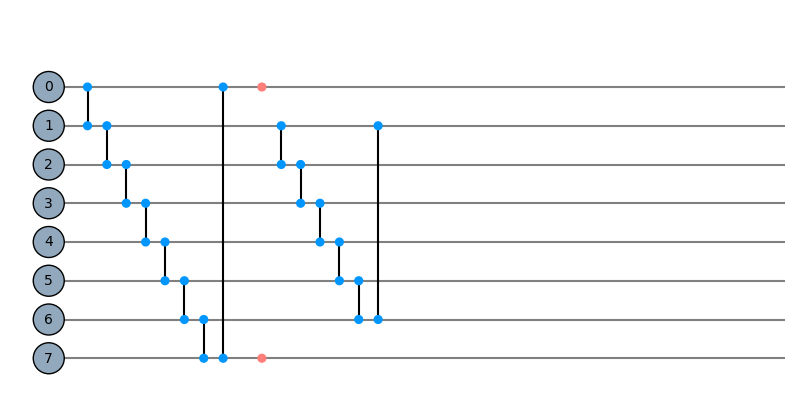

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [23]:
u0_2 = Qunitary(function=None, n_symbols=0, arity=2)
mask = Qinit(8) + Qcycle(mapping=u0_2) + Qmask("1*1") + Qcycle(mapping=u0_2)
plot_circuit(mask)

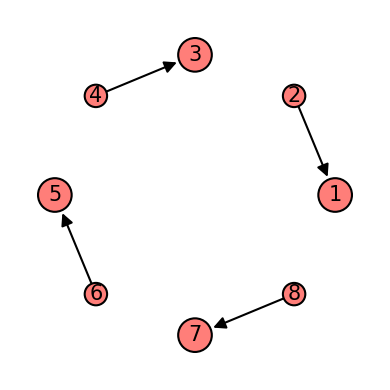

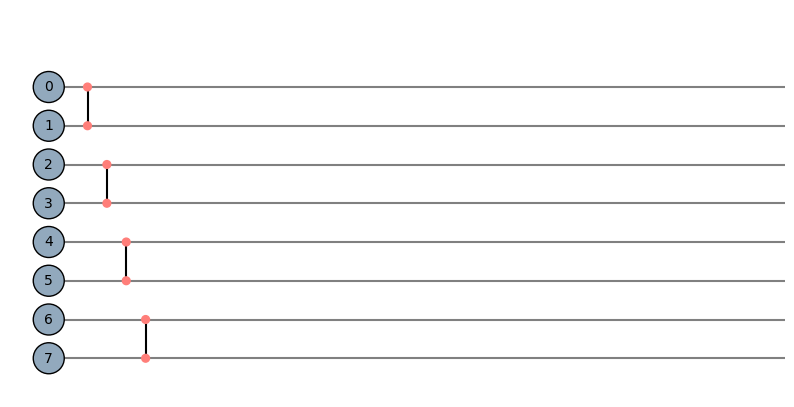

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [24]:
mask = Qinit(8) + Qmask("01", mapping=u0_2)
plot_motif(mask[1])
plot_circuit(mask)

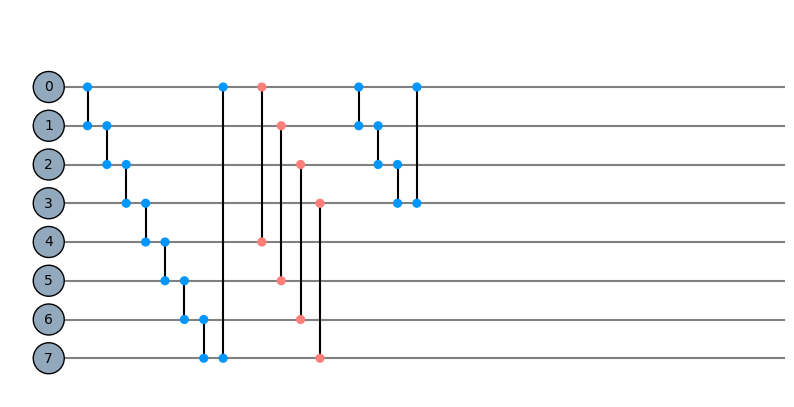

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [25]:
mask = Qinit(8) + Qcycle(mapping=u0_2) + Qmask("*!", mapping=u0_2) + Qcycle(mapping=u0_2)
plot_circuit(mask)

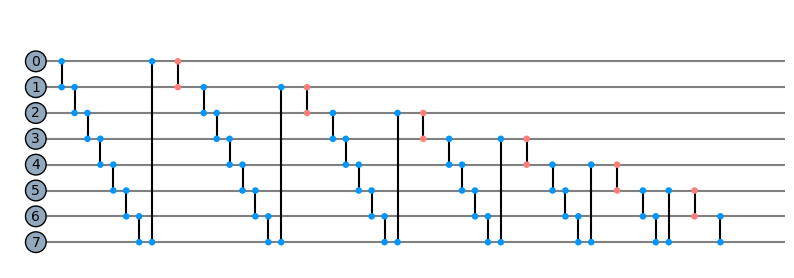

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [26]:
mask = Qinit(8) + Qcycle(mapping=u0_2) + (Qmask("1*", mapping=u0_2) + Qcycle(mapping=u0_2))*6
plot_circuit(mask, depth=30)

In [27]:
def V3(bits, symbols=None):
  qml.CNOT(wires=[bits[0], bits[1]])
  qml.CNOT(wires=[bits[2], bits[1]])
v3 = Qunitary(V3, 0, 3)


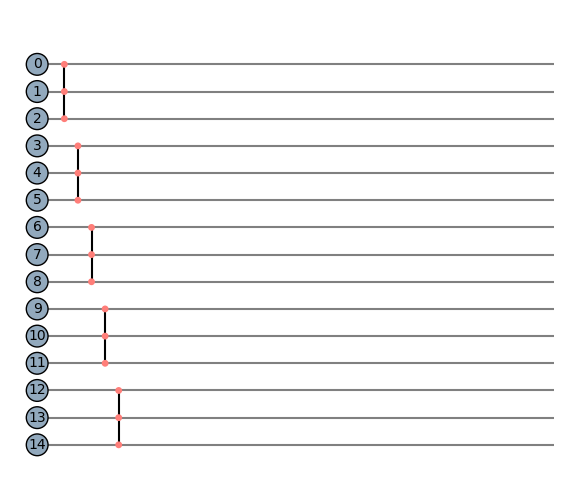

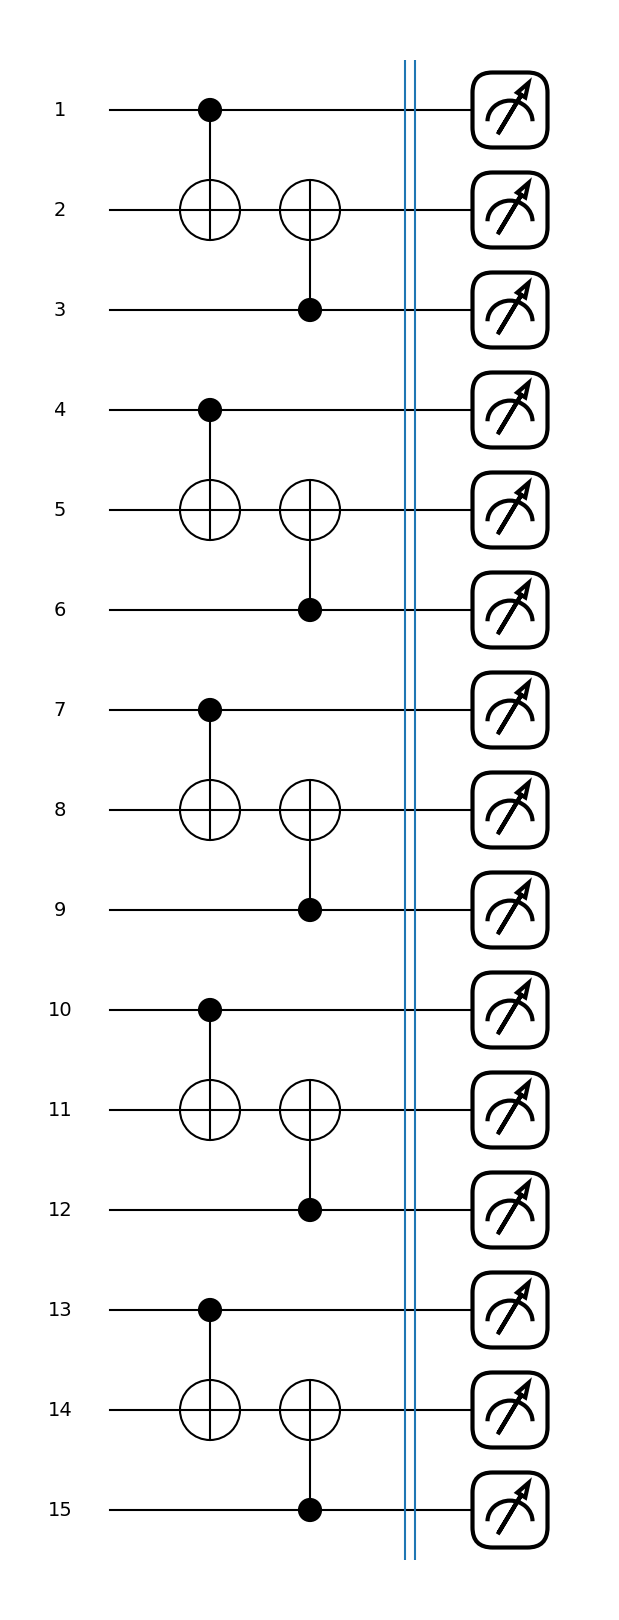

In [28]:
mask = Qinit(15) + Qmask(global_pattern="101",merge_within="101", strides=[1,0,0], steps=[2,1,1], offsets=[0,0,0], mapping=v3)
plot_circuit(mask)
circuit = get_circuit(mask)
draw_circuit(circuit)

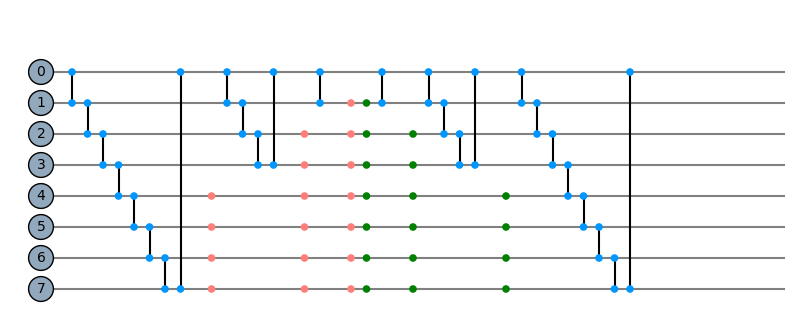

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [29]:
hierq = Qinit(8) + (Qcycle(1, 1, 0, mapping=u0_2) + Qmask("*!"))*3 + (Qunmask("previous") + Qcycle(1, 1, 0, mapping=u0_2))*3
plot_circuit(hierq, depth=25)

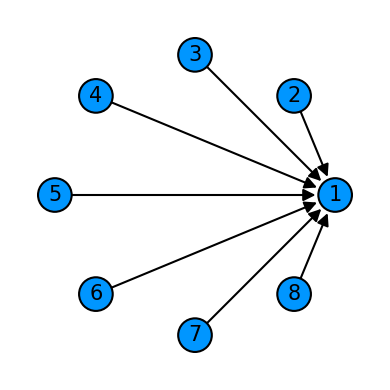

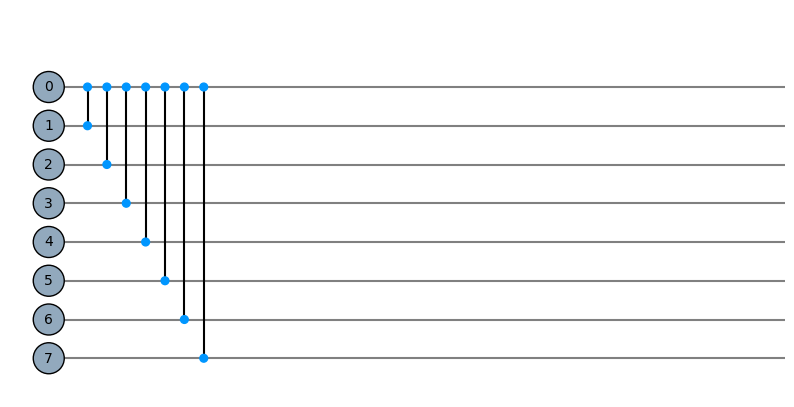

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [30]:
hierq = Qinit(8) + Qpivot(
    global_pattern="1*",
    merge_within="*1",
    merge_between=None,
    strides=[1, 1, 0],
    steps=[1, 1, 1],
    offsets=[0, 0, 0],
    boundaries=["open", "open", "periodic"],
    mapping=u1_2)
plot_motif(hierq[1])
plot_circuit(hierq)

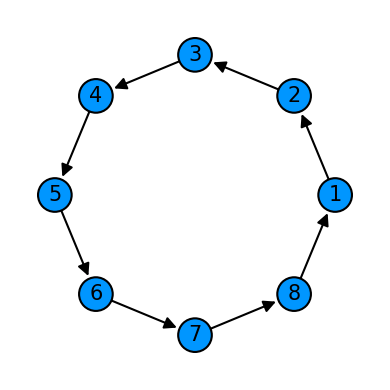

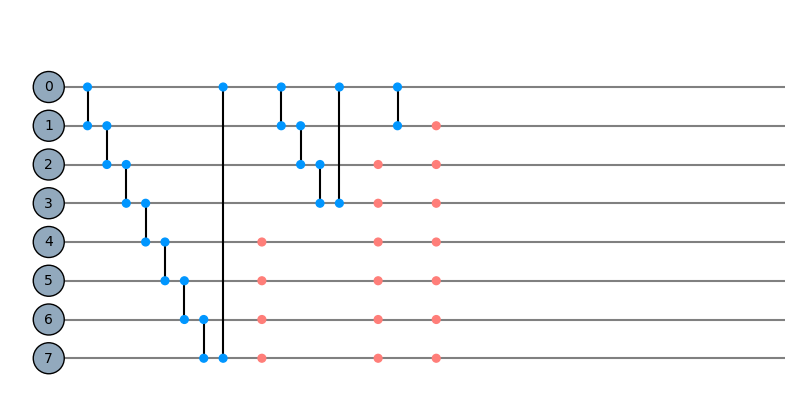

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [31]:
qcnn_1 = Qinit(8) + (Qcycle(1) + Qmask("right")) * 3
plot_motif(qcnn_1[1])
plot_circuit(qcnn_1)

In [32]:
def U2(bits, symbols=None):
  qml.CRZ(symbols[0], wires=[bits[0], bits[1]])
u2 = Qunitary(U2, 1, 2)

In [33]:
def UCNOT(bits, symbols=None):
  qml.CNOT(wires=[bits[0], bits[1]])
ucnot = Qunitary(UCNOT, 0, 2)

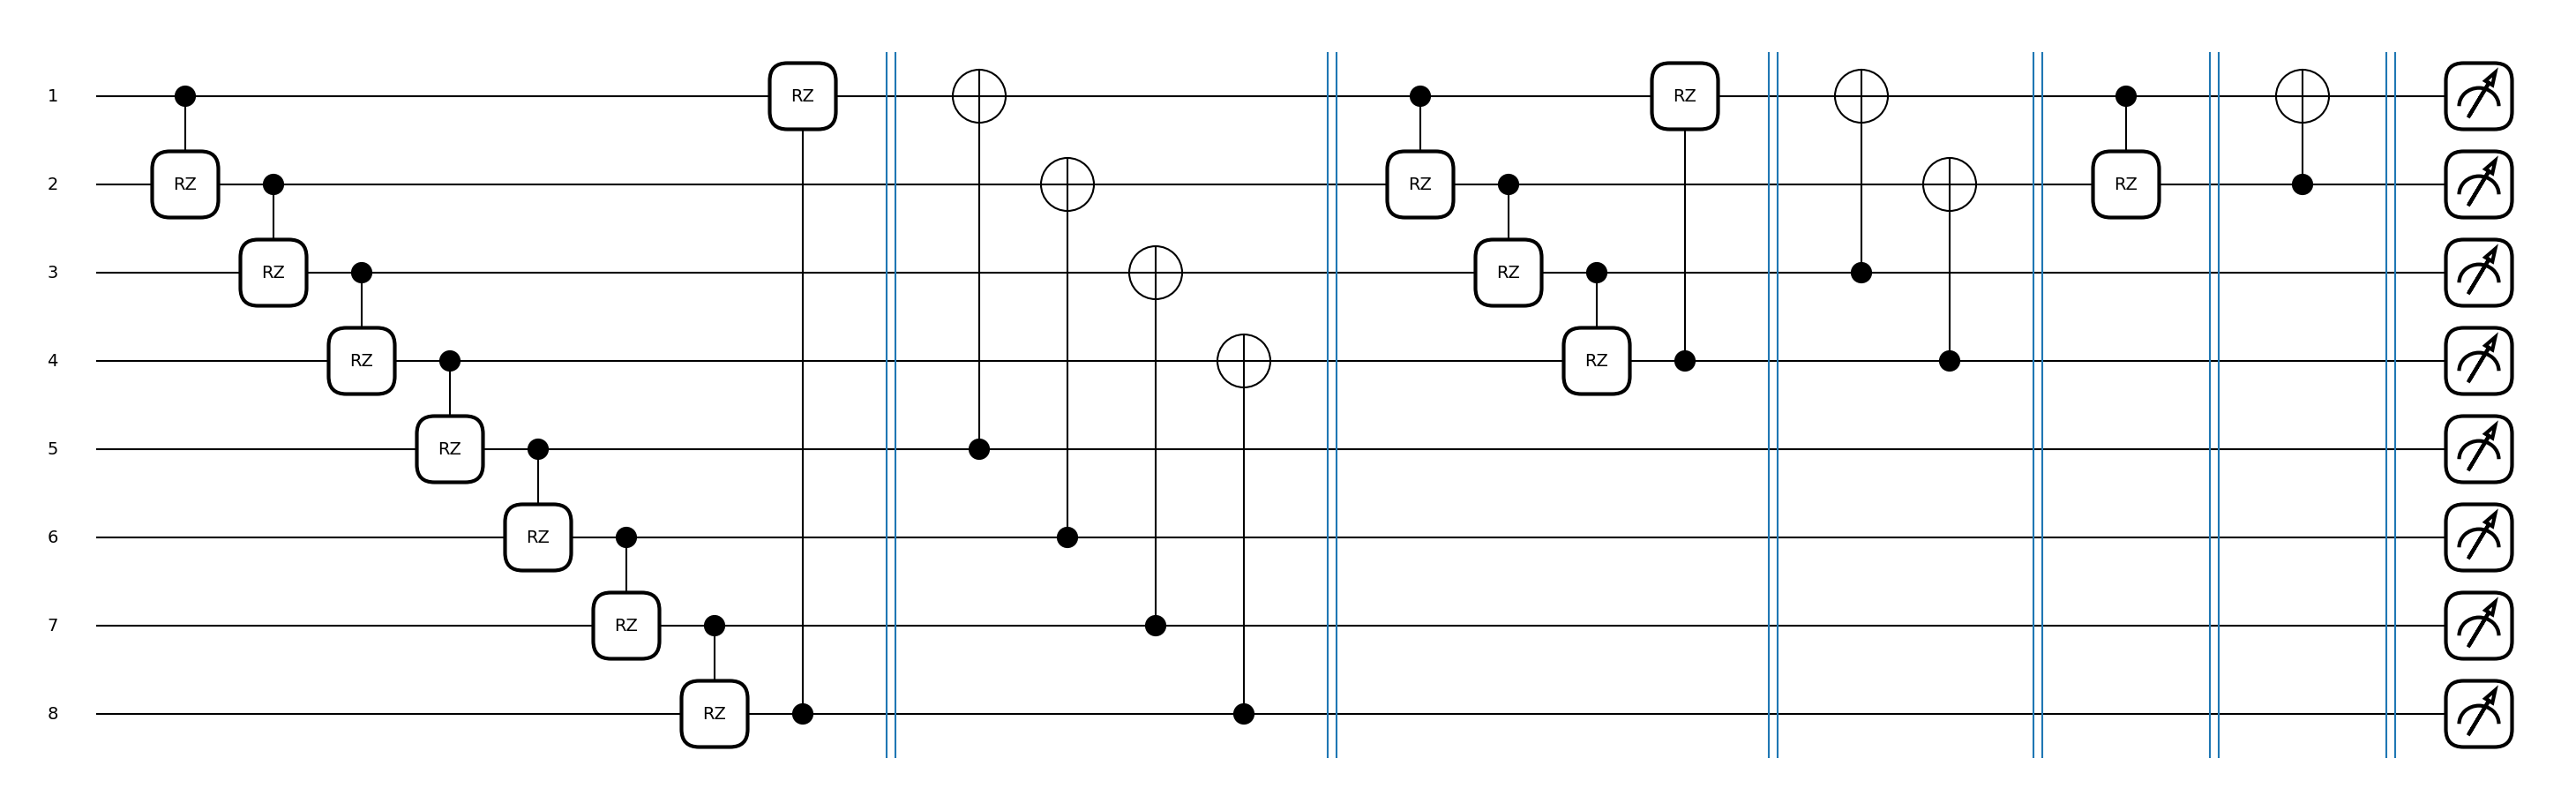

In [34]:
qcnn_1 = Qinit(8) + (Qcycle(1, mapping=u2) + Qmask("right", mapping=ucnot)) * 3
# plot_circuit(qcnn_1)
circuit = get_circuit(qcnn_1)
draw_circuit(circuit)

In [35]:
from hierarqcal import Qconv, Qpool, Qfree
from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister

def U(bits, symbols=None, circuit=None):
    q0, q1 = QuantumRegister(1, bits[0]), QuantumRegister(1, bits[1])
    circuit.cry(symbols[0], q0, q1)
    circuit.cry(symbols[1], q1, q0)
    return circuit

q_n= [f"q{k}" for k in range(1,6,1)] # qubit names
conv_1 = Qfree(q_n) + Qconv(1, convolution_mapping=(U,2))
conv_3 = Qfree(q_n) + Qconv(3, convolution_mapping=(U,2))


ImportError: cannot import name 'Qconv' from 'hierarqcal' (/home/ludovicowan/Dev/dev-tools/miniconda3/envs/qiskit-env/lib/python3.11/site-packages/hierarqcal/__init__.py)